In [1]:
# ruff: noqa: E402
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

# Util to import functions from project root
p = Path.cwd()
root = next(
    (
        parent
        for parent in [p] + list(p.parents)
        if (parent / "pyproject.toml").exists()
    ),
    None,
)
if root is None:
    root = Path.cwd()
sys.path.insert(0, str(root))


In [2]:
df = pd.read_csv("../src/data/train_data.csv")
df.set_index("row_id", inplace=True)
df.drop(columns=["Unnamed: 0"], inplace=True)
target = "reservation_status"

# Check nans
assert df.isna().sum().unique() == 0

df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
row_id,,,,,,,,,,,,,,,,,,,,,
0,City Hotel,47,2016,March,13,20,2,2,2,0.0,...,A,D,0,No Deposit,0,Transient,85.00,0,0,2
1,Resort Hotel,221,2017,April,18,30,2,5,2,0.0,...,A,A,0,No Deposit,0,Transient-Party,71.43,0,0,1
2,City Hotel,11,2016,February,6,1,2,5,2,0.0,...,A,A,0,No Deposit,0,Transient,79.00,0,0,1
3,Resort Hotel,88,2015,November,48,28,2,4,2,0.0,...,A,A,0,No Deposit,0,Transient,32.40,0,0,1
4,Resort Hotel,250,2017,August,33,13,2,2,2,0.0,...,A,A,1,No Deposit,0,Transient,106.85,0,1,0


In [3]:
df.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
count,68898.000000,68898.000000,68898.000000,68898.000000,68898.000000,68898.000000,68898.000000,68898.000000,68898.000000,68898.000000,68898.000000,68898.000000,68898.000000,68898.000000,68898.000000,68898.000000,68898.000000,68898.000000
mean,104.201878,2016.159424,27.113124,15.798572,0.930796,2.496981,1.856759,0.105010,0.008055,0.031888,0.090525,0.131005,0.219571,2.300894,102.039591,0.062106,0.569320,0.380519
std,106.970199,0.705899,13.549977,8.777819,0.996605,1.895463,0.553997,0.401118,0.102690,0.175702,0.902800,1.505454,0.645983,17.472597,52.305946,0.244398,0.789934,0.505553
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000
50%,69.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000
75%,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,1.000000
max,709.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,50.000000,10.000000,10.000000,1.000000,26.000000,72.000000,17.000000,391.000000,5400.000000,8.000000,5.000000,2.000000


In [4]:
# Transform "hotel" into is_City_hotel 1 for true, 0 for false
print(df["hotel"].astype("category").value_counts())
df["is_City_hotel"] = (df["hotel"] == "City Hotel").astype(int)
df["is_City_hotel"].value_counts()
df.drop(columns=["hotel"], inplace=True)

hotel
City Hotel      45872
Resort Hotel    23026
Name: count, dtype: int64


In [5]:
# We differentiate between the home country (PRT) and others
df["country"].value_counts()
df["is_PRT"] = (df["country"] == "PRT").astype(int)
df["is_PRT"].value_counts()
df.drop(columns=["country"], inplace=True)



lead_time not plotted too many classes


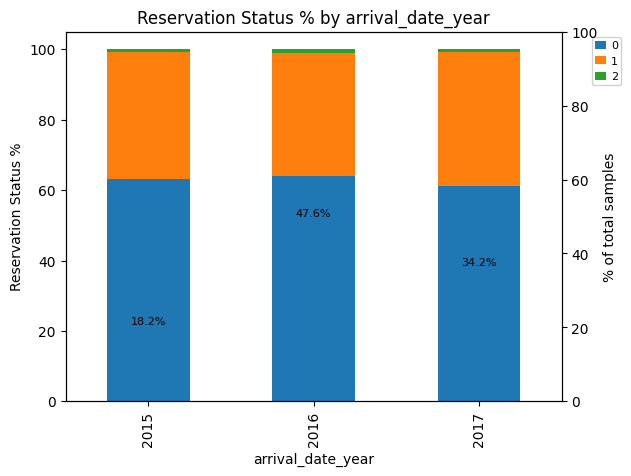

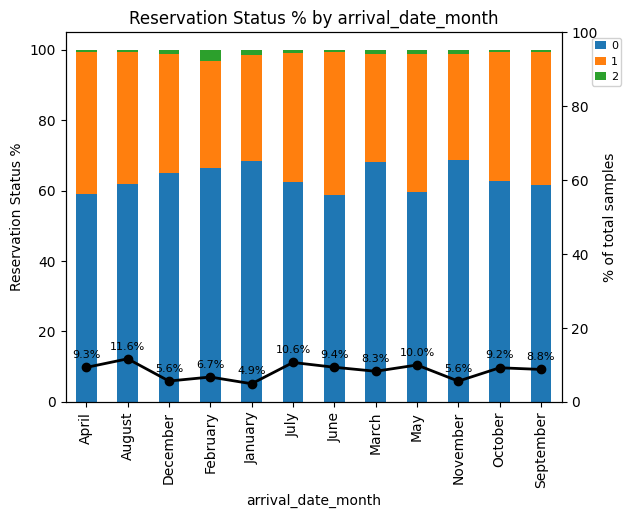

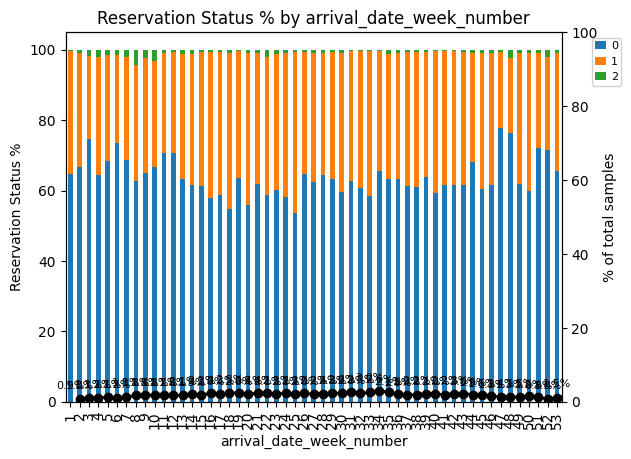

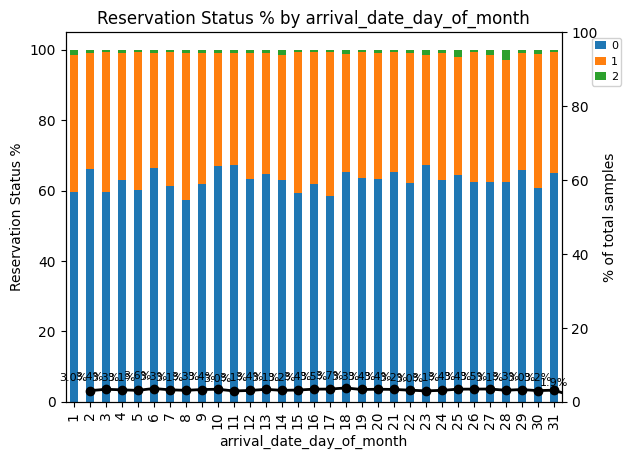

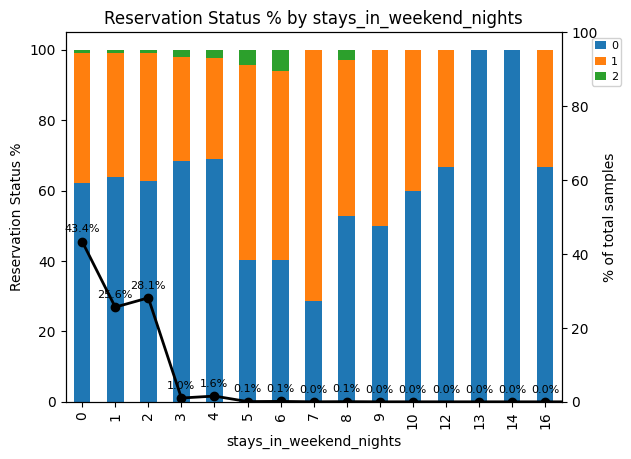

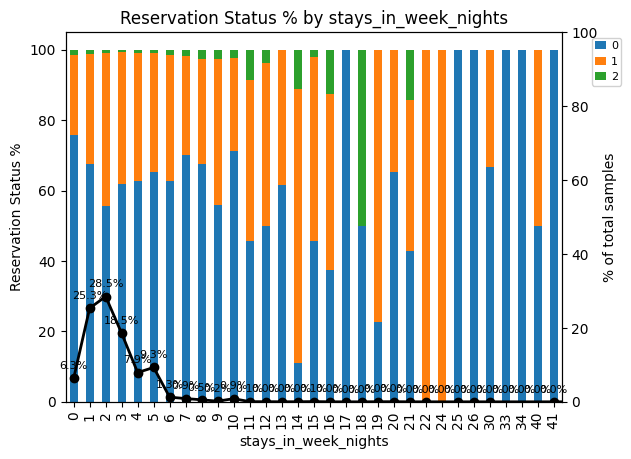

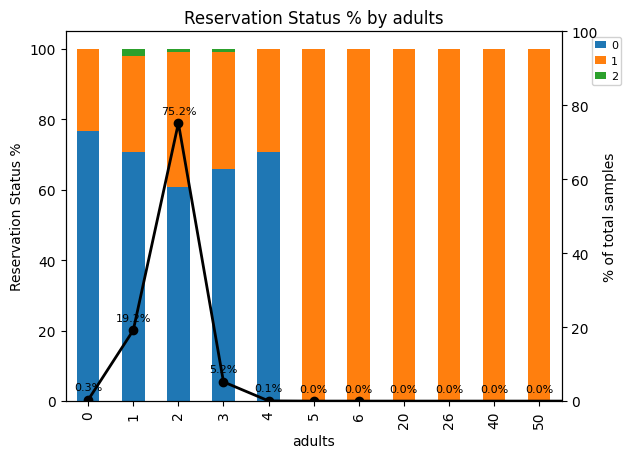

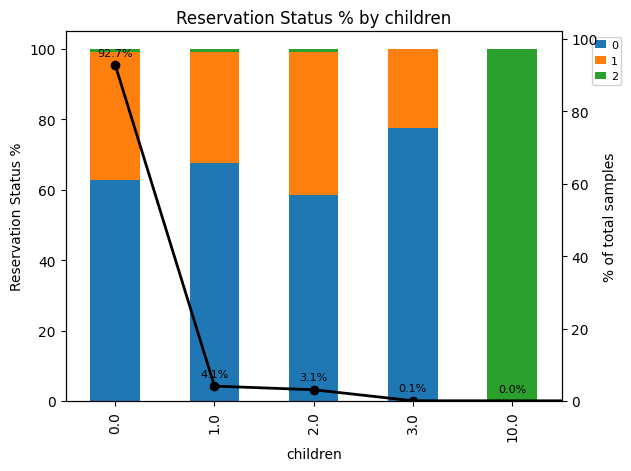

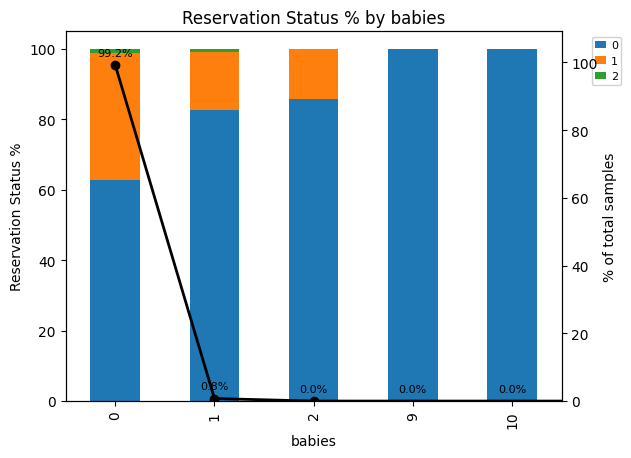

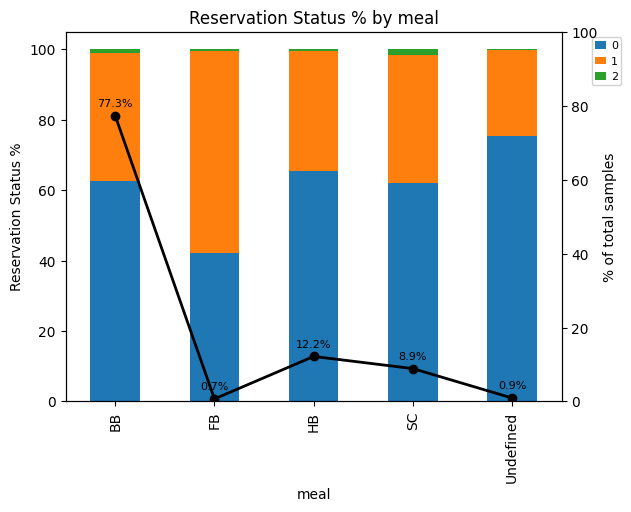

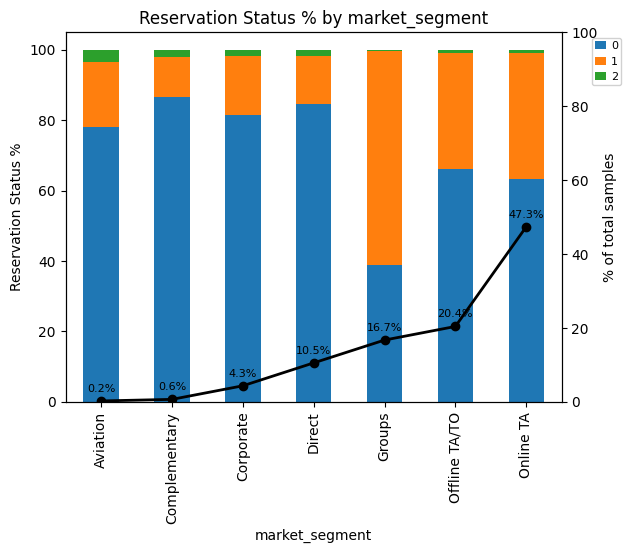

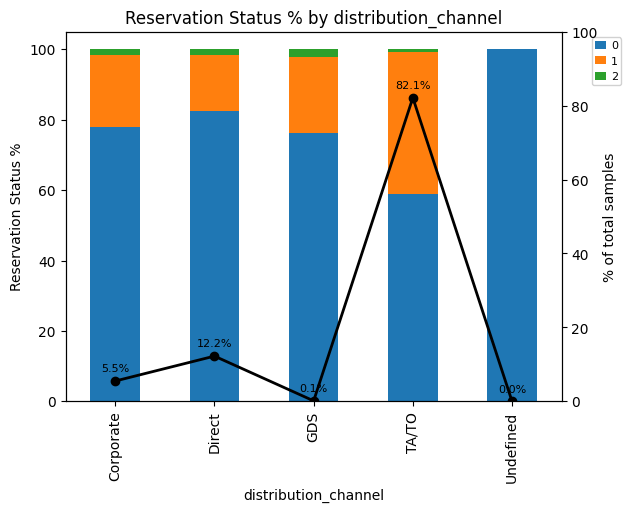

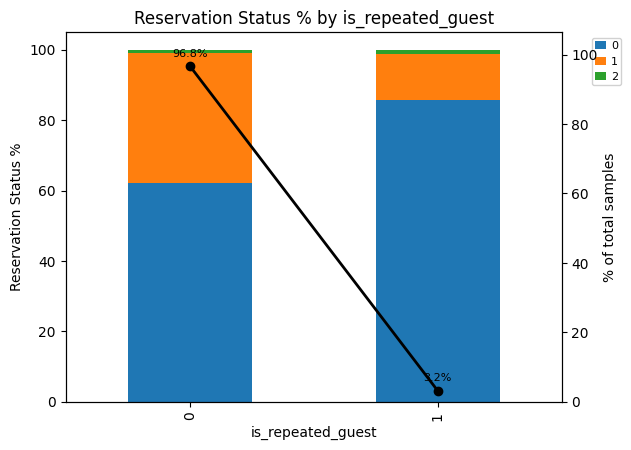

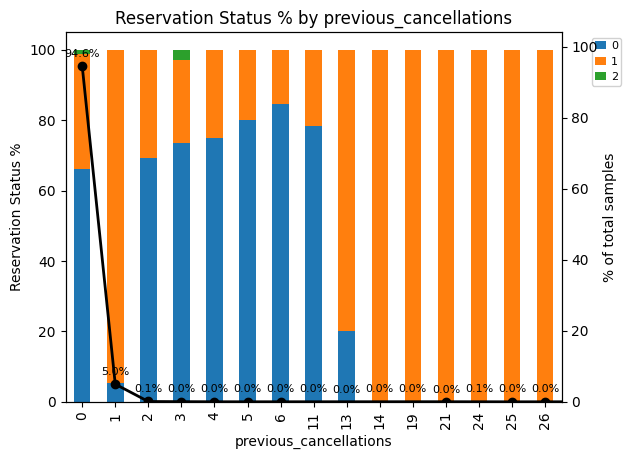

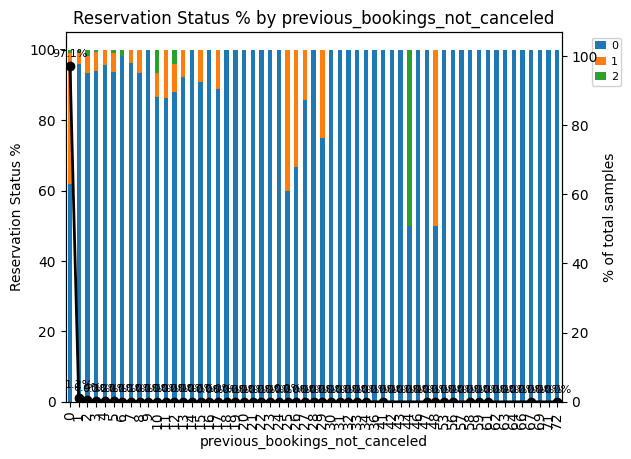

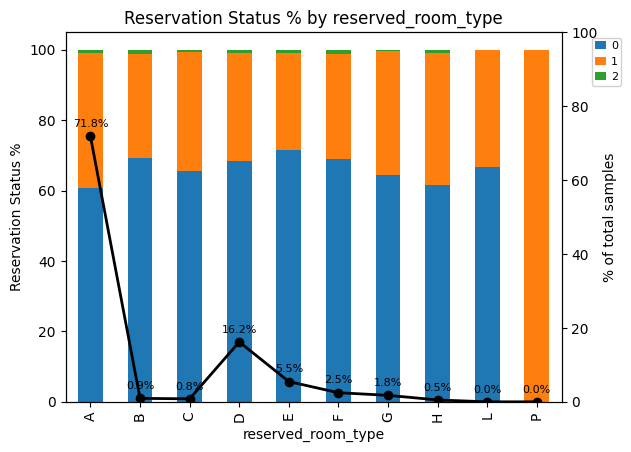

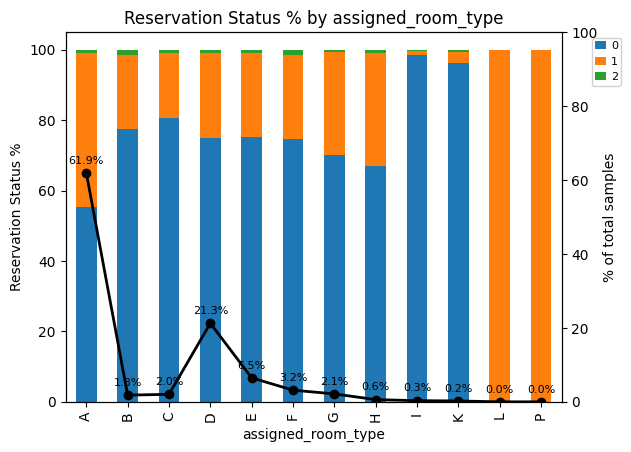

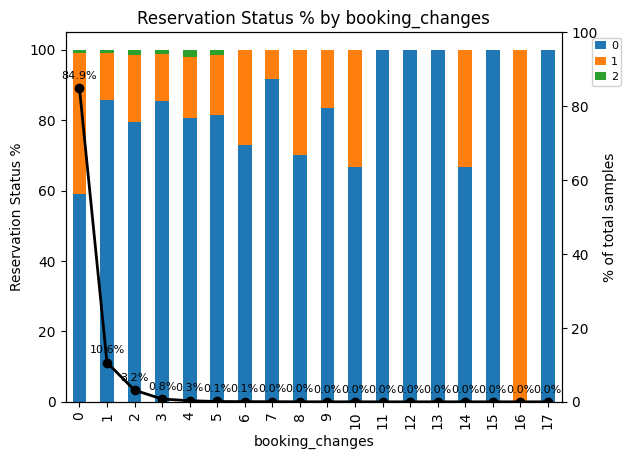

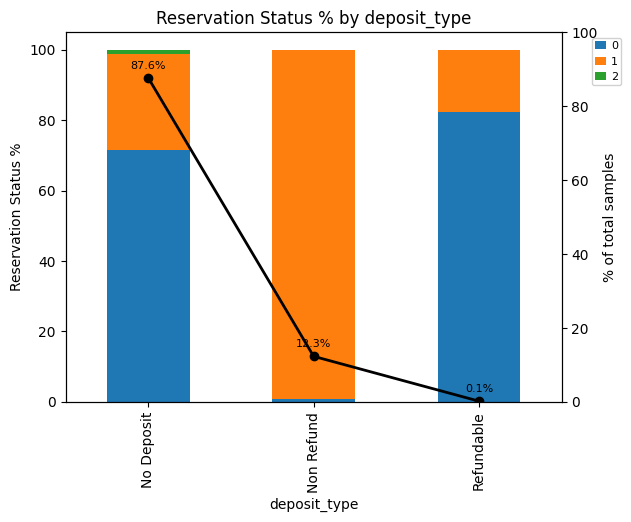

days_in_waiting_list not plotted too many classes


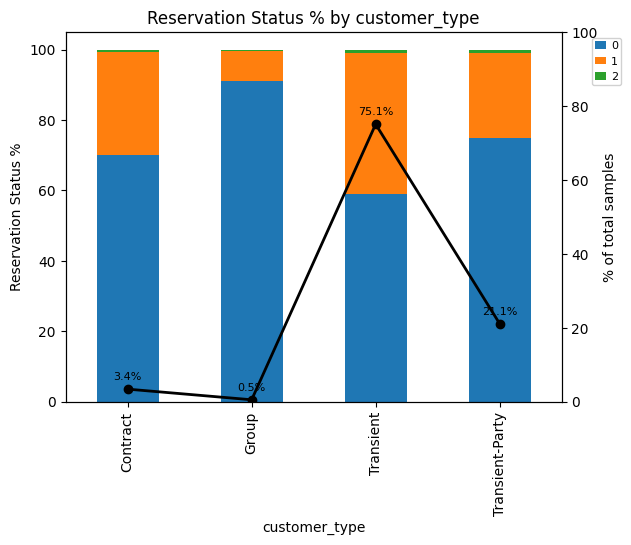

adr not plotted too many classes


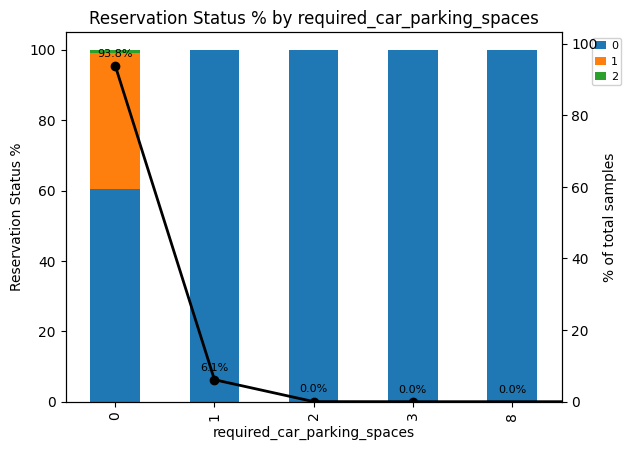

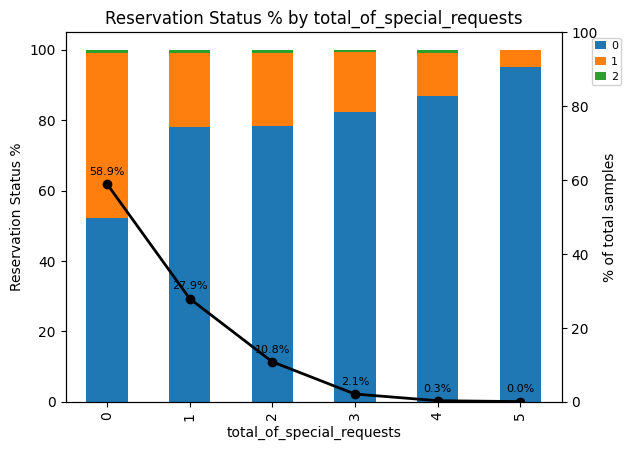

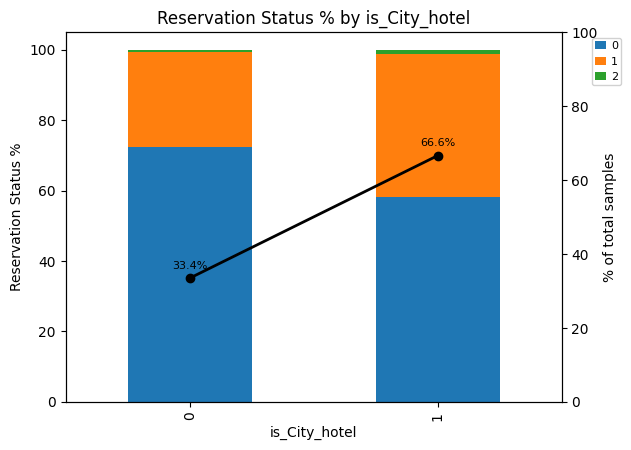

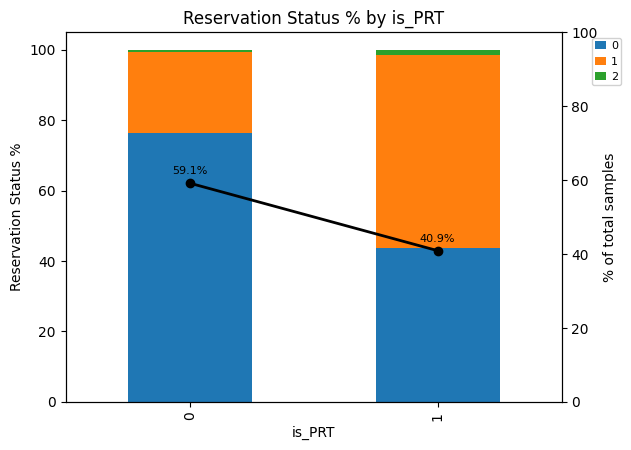

In [6]:
def make_percent(col):
    if len(df[col].unique()) >= 100:
        print(f"{col} not plotted too many classes")
        return 0
    if col == target:
        return 0
    meal_target_pct = (
        df.groupby(col)[target]
        .value_counts(normalize=True)
        .unstack(fill_value=0)
        .multiply(100)
    )

    # percentage weight of each class in `col` relative to total rows
    class_pct = (
        df[col]
        .value_counts(normalize=True)
        .multiply(100)
        .reindex(meal_target_pct.index)
        .fillna(0)
    )

    ax = meal_target_pct.plot(kind="bar", stacked=True)
    ax.set_title(f"Reservation Status % by {col}")
    ax.set_xlabel(f"{col}")
    ax.set_ylabel("Reservation Status %")
    ax.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        prop={"size": 8},
        handlelength=1,
        handletextpad=0.4,
        borderpad=0.3,
        framealpha=0.9,
    )

    # overlay the class weight as a line on a secondary y-axis
    ax2 = ax.twinx()
    class_pct.plot(kind="line", marker="o", color="k", ax=ax2, linewidth=2)
    ax2.set_ylabel("% of total samples")
    ax2.set_ylim(0, max(100, class_pct.max() * 1.1))

    # annotate class weights
    for x, y in enumerate(class_pct.values):
        ax2.text(
            x,
            y + (ax2.get_ylim()[1] * 0.02),
            f"{y:.1f}%",
            ha="center",
            va="bottom",
            fontsize=8,
        )

    plt.show()


for col in df.columns:
    make_percent(col)